
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E00_linear_regression.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Linear regression exercises

---
These are introductory exercises in Machine learning with focus in **linear regression** .

<p class = "alert alert-info" role="alert"><b>Note</b> all datasets used in this exercise can be found under Data folder of the course Github repo</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Simulate phone dataset (*)

We want to simulate data $(x,y)$ to represent cost for phone subscriptions, with: 

- $x$ - called minutes per month
- $y$ - SEK per month 

&nbsp; a) Use ```numpy.random.normal()``` to simulate a dataset with the following requirements:(*)
- set a seed to 42 (for reproducibility and reference)
- simulate 400 x-values from the r.v. $X \sim \mathcal{N}(100, 100)$ 
- take absolute value of these x-values
- simulate noise 400 noise values from r.v. $\epsilon \sim \mathcal{N(0, 50)}$ 
- Let $y = 2x+25+\epsilon$
- plot the data set 

&nbsp; b) Now we want to remove some outliers according to this assumption: (*)
- no one talks more than 300 min using this type of subscription
- no ones costs can be negative
- plot the new dataset
- also plot ground truth using the true parameters $\beta_0 = 25, \beta_1 = 2$

&nbsp; c) Insert the values into a DataFrame (*)

<details>

<summary>Answer</summary>

<img src="../assets/simulated_phone_dataset_0.png" height="200"/>

a) 

Number of points x ≥ 300 min: 8

Number of points y < 0 kr: 6


b)

Length of x, outliers removed 386

Length of y, outliers removed 386

c)

df.head()

|    |   Minutes |     Cost |
|---:|----------:|---------:|
|  0 |   59.4428 | 168.721  |
|  1 |   40.0625 |  98.2118 |
|  2 |  100.524  | 258.433  |
|  3 |  104.698  | 310.548  |
|  4 |   54.9935 | 123.279  |


</details>

---

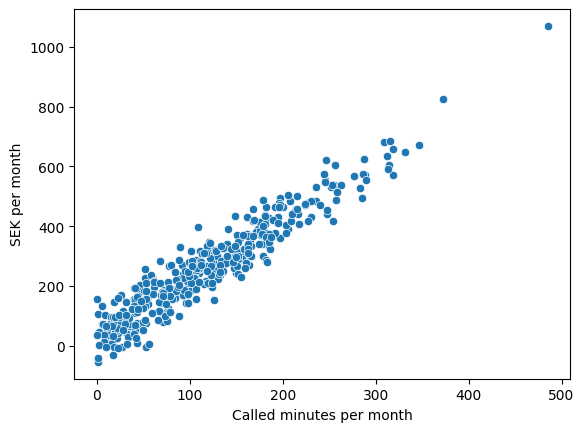

In [45]:
# Importera nödvändiga bibliotek
import numpy as np  # För numeriska beräkningar och arrayhantering
import matplotlib.pyplot as plt  # För att skapa grafer
import seaborn as sns  # För enklare och snyggare visualiseringar
import pandas as pd  # För datamanipulation (används inte direkt här)

# Sätt ett frö för reproducerbarhet av slumpmässiga tal
np.random.seed(42)

# Generera data för x-variabeln (ringda minuter per månad)
phone_sub_x = np.abs(np.random.normal(100, 100, 400))  # 400 värden från normalfördelning, absolutvärden

# Generera slumpmässiga feltermer
phone_sub_error = np.random.normal(0, 50, 400)  # 400 feltermer med medelvärde 0 och standardavvikelse 50

# Skapa y-variabeln (kostnad i SEK per månad) med en linjär modell + feltermer
phone_sub_y = 2 * phone_sub_x + 25 + phone_sub_error  # y = 2x + 25 + brus

# Skapa "ground truth" (den sanna linjära modellen utan brus)
ground_truth = 2 * phone_sub_x + 25  # y = 2x + 25

# Skapa en scatter plot för att visualisera datan
fig, ax = plt.subplots(dpi=100)  # Skapa en figur med hög upplösning
sns.scatterplot(x=phone_sub_x, y=phone_sub_y)  # Scatter plot för x och y
ax.set(xlabel="Called minutes per month", ylabel="SEK per month")  # Sätt axelbeskrivningar
plt.show()  # Visa plotten

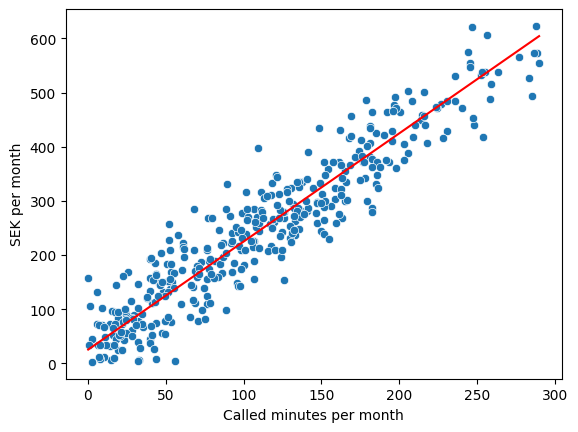

In [46]:
# Skapa en DataFrame från x- och y-värdena och transponera den
phone_sub_df = pd.DataFrame((phone_sub_x, phone_sub_y)).T  # Kombinera x och y till en DataFrame
phone_sub_df.columns = ["x", "y"]  # Ge kolumnerna namn

# Ta bort alla x-värden över 300
phone_sub_df = phone_sub_df[phone_sub_df["x"] < 300]  # Filtrera bort x-värden > 300

# Ta bort alla negativa y-värden
phone_sub_df = phone_sub_df[phone_sub_df["y"] > 0]  # Filtrera bort y-värden <= 0

# Skapa en scatter plot och en linjeplot för att visualisera datan och den sanna modellen
fig, ax = plt.subplots(dpi=100)  # Skapa en figur med hög upplösning
sns.scatterplot(x=phone_sub_df["x"], y=phone_sub_df["y"])  # Scatter plot för x och y
sns.lineplot(x=phone_sub_df["x"], y=2 * phone_sub_df["x"] + 25, color="red")  # Linjeplot för den sanna modellen
ax.set(xlabel="Called minutes per month", ylabel="SEK per month")  # Sätt axelbeskrivningar
plt.show()  # Visa plotten

In [47]:
# Visa de första 5 raderna av DataFrame:n för att inspektera datan
phone_sub_df.head()

,x,y
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


## 1. Train|test split (*)

Before moving on with linear regression we shall first perform a train-test-split. 

&nbsp; a) Create a train-test-split function with the following call signature: (*)

```py
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction=.7: float, random_state=42: int, replace=False: bool) -> tuple
```

that returns the tuple:
```
(X_train, X_test, y_train, y_test)
```

&nbsp; b) Now use this to split up your data into a training set and test set. Check manually that the split is performed correctly. (*)


<details>

<summary>Hint</summary>

b) Check the length of each set, and check the indices of the sorted sets that they don't overlap and are not missing. Also check that they sum up to what you expect.

</details>

<br/>

<details>

<summary>Answer</summary>

Using default 0.7: 
- length of X_train: 270
- length of X_test: 116
- length of y_train: 270
- length of X_test: 116

</details>

---

In [48]:
def train_test_split(df, train_fraction=0.7, random_state=42, replace=False):
    # Dela upp x-värdena i tränings- och testdata
    train_x = df["x"].sample(n=int(len(df) * train_fraction), random_state=random_state, replace=replace)  # Slumpmässigt urval för träningsdata
    test_x = df["x"].drop(train_x.index)  # Resten blir testdata

    # Dela upp y-värdena baserat på de valda x-värdena
    train_y = df.loc[train_x.index, "y"]  # y-värden för träningsdata (använd samma index som train_x)
    test_y = df.loc[test_x.index, "y"]  # y-värden för testdata (använd samma index som test_x)

    # Konvertera till DataFrame och lägg till en intercept-kolumn (för linjär regression)
    train_x = pd.DataFrame(train_x, columns=["x"])  # Skapa DataFrame för tränings-x
    train_x.insert(0, "intercept", 1)  # Lägg till en kolumn med 1:or för intercept

    test_x = pd.DataFrame(test_x, columns=["x"])  # Skapa DataFrame för test-x
    test_x.insert(0, "intercept", 1)  # Lägg till en kolumn med 1:or för intercept

    # Returnera tränings- och testdata
    return (train_x, test_x, train_y, test_y)

In [49]:
# Dela upp datan med train_test_split
split_data = train_test_split(phone_sub_df)

# Hämta tränings- och testdatan från split_data
X_train, X_test, y_train, y_test = split_data

# Skriv ut längden på varje del
print("Length of X_train:", len(X_train))
print("Length of X_test:", len(X_test))
print("Length of y_train:", len(y_train))
print("Length of y_test:", len(y_test))

Length of X_train: 266
Length of X_test: 115
Length of y_train: 266
Length of y_test: 115


## 2. Simple linear regression with normal equation (*)

Use the normal equation for simple linear regression to solve for the coefficients $\hat{\beta} = (\beta_0, \beta_1)$. Note that you should only use the training data to fit the regression line, and not data from the test set. Plot the the regression line, together with ground truth and training data. 

<details>

<summary>Hint</summary>

It is important to keep track of the shapes of the vectors, matrices in order for matrix multiplication matmul "@" to work correctly. Also, if you have series object, you need to convert it to numpy. 

</details>

<br/>

<details>

<summary>Answer</summary>


<img src="../assets/Reg_line_normal_eq.png" height="200"/>

</details>

---

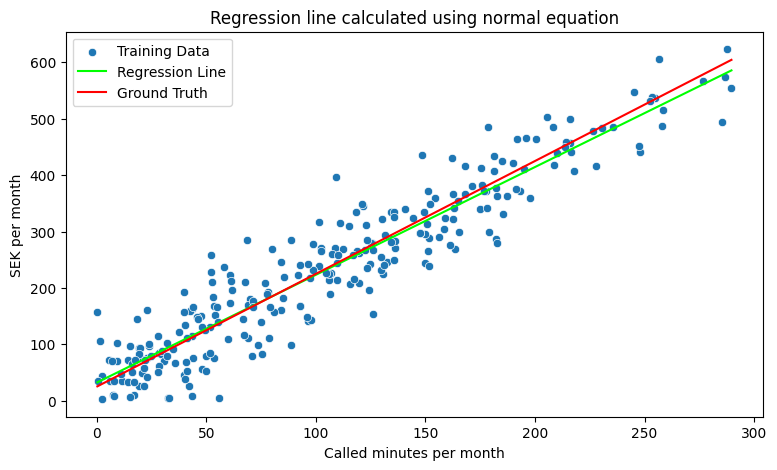

In [50]:
# Dela upp datan i tränings- och testdata med hjälp av train_test_split-funktionen
split_data = train_test_split(phone_sub_df)

# Definiera en funktion för att beräkna linjär regression med normalekvationen
regression_fit = lambda X, y: np.linalg.pinv(X.T @ X) @ X.T @ y  # Beräkna koefficienter (beta_hat)

# Anpassa modellen till träningsdatan och beräkna koefficienterna (beta_hat)
beta_hat = regression_fit(split_data[0], split_data[2])

# Definiera en funktion för att beräkna förutsagda y-värden (y_hat) baserat på x och beta_hat
def y_hat(x): return beta_hat[0] + beta_hat[1] * x  # y_hat = intercept + slope * x

# Skapa en plot för att visualisera träningsdatan, regressionslinjen och den sanna modellen
fig, ax = plt.subplots(figsize=[9, 5], dpi=100)  # Skapa en figur med storlek och upplösning
sns.scatterplot(x=split_data[0]["x"], y=split_data[2], label="Training Data")  # Scatter plot för träningsdata
sns.lineplot(x=split_data[0]["x"], y=y_hat(split_data[0]["x"]), color="lime", label="Regression Line")  # Regressionslinje
sns.lineplot(x=split_data[0]["x"], y=2 * split_data[0]["x"] + 25, color="red", label="Ground Truth")  # Sann modell
ax.set(xlabel="Called minutes per month", ylabel="SEK per month", title="Regression line calculated using normal equation")  # Sätt axelbeskrivningar och titel
plt.show()  # Visa plotten

## 3. Prediction and evaluation (*)

&nbsp; a) Use your model to make prediction on testing data. Plot the prediction cost against X_test, and y_test against X_test. (*)

&nbsp; b) Calculate MAE, MSE, RMSE (*)

<details>

<summary>Hint</summary>

Calculate y_pred from X_test and use y_test and y_pred to compute different evaluation metrics.

Careful with dimensions when computing the evaluation metrics, else it can be catastrophical logical errors due to numpy broadcasting feature.

Note that after you have calculate the error metrics on test data you are not allowed to change any parameters to make the line fit better to the testing data.

</details>

<br/>

<details>

<summary>Answer</summary>

a) 

<img src="../assets/eval_simple_lin_reg.png" height="200"/>

b)

Mean absolute error on testing data: 36.97 kr

Mean squared error on testing data: 2374 kr^2

Root mean squared error on testing data: 48.72 kr

</details>

---

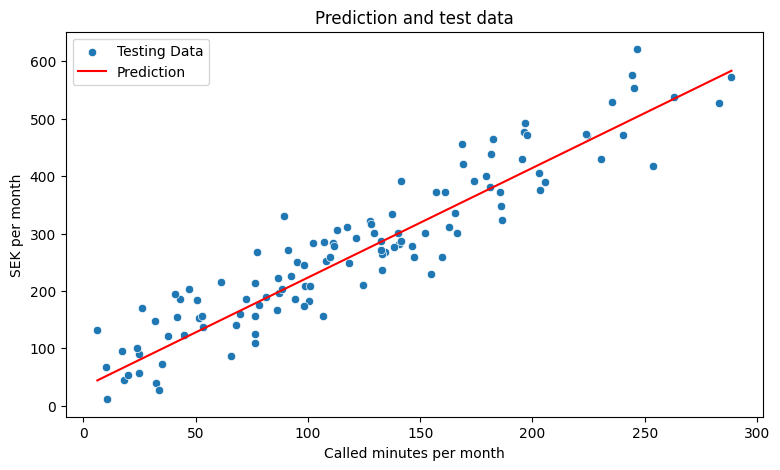

In [51]:
# Definiera en lambda-funktion för att göra förutsägelser baserat på datan (X) och vikterna (weights)
predict = lambda X, weights: X @ weights  # Matrismultiplikation: X * weights

# Använd funktionen för att förutsäga y-värden (y_pred) för testdatan (split_data[1]) med de beräknade vikterna (beta_hat)
y_pred = predict(split_data[1].to_numpy(), beta_hat)  # X_test (split_data[1]) omvandlas till numpy-array för matrismultiplikation

# Skapa en figur för att visualisera testdatan och förutsägelserna
fig, ax = plt.subplots(figsize=[9, 5], dpi=100)  # Skapa en figur med storlek och upplösning

# Scatter plot för testdatan (x och y-värden från testdatan)
sns.scatterplot(x=split_data[1]["x"], y=split_data[3], label="Testing Data")  # Testdatan plottas som punkter

# Linjeplot för förutsägelserna (y_pred) baserat på testdatan
sns.lineplot(x=split_data[1]["x"], y=y_pred, color="red", label="Prediction")  # Förutsägelserna plottas som en röd linje

# Sätt axelbeskrivningar och titel
ax.set(xlabel="Called minutes per month", ylabel="SEK per month", title="Prediction and test data")  # Beskrivningar och titel

# Visa plotten
plt.show()

In [52]:
# Beräkna antalet observationer i testdatan (m)
m = len(split_data[3])  # Antalet y-värden i testdatan

# Beräkna Mean Absolute Error (MAE)
MAE = 1/m * np.sum(np.abs(split_data[3] - y_pred))  # Genomsnittligt absolut fel mellan verkliga och förutsagda värden

# Beräkna Mean Squared Error (MSE)
MSE = 1/m * np.sum((split_data[3] - y_pred)**2)  # Genomsnittligt kvadratiskt fel mellan verkliga och förutsagda värden

# Beräkna Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)  # Kvadratroten av MSE, ger fel i samma enheter som y-värdena

# Returnera MAE, MSE och RMSE
MAE, MSE, RMSE

(np.float64(40.120026511494814),
 np.float64(2401.5771288679935),
 np.float64(49.00588871623484))

## 4. Simulate more explanatory variables (\*)

Now we will simulate the explanatory variables for minutes, text messages and amount of surf. For reference and reproducibility use numpy random seed 42. Assume there is:

- mean start cost: 25kr
- mean cost per minute: 2kr
- mean cost per sms: 50 öre
- mean cost per GB: 50kr

Then the model for the cost will be:
$y = 25 + 2x_1 + 0.5x_2 + 50x_3 + \epsilon$, where

- $x_i$ sampled from r.v. $X_i$ for $i = \{1,2,3\}$
- $X_1 \sim |\mathcal{N}(100,100)|$, (absolute value)
- $X_2 \sim \mathcal{U}(0,50)$, (discrete uniform distribution)
- $X_3 \sim |\mathcal{N}(0,2)|$,
- $\epsilon \sim \mathcal{N}(0,50)$

&nbsp; a) Simulate 10000 samples of each of $x_1, x_2, x_3$ and $y$ and save them in a DataFrame. Also add an intercept column containing ones. (\*)

&nbsp; b) Make histograms for each of the explanatory variables $x_1, x_2, x_3$ and the response variable $y$ (\*)

&nbsp; c) Clean the data using the following constraints (\*)

- surf should be less than 4
- minutes should be less than 300
- cost should be larger than 0

&nbsp; d) Make new histograms for the variables. (\*)

<details>

<summary>Hint</summary>
Your data analysis skill toolbox together with statistics and linear algebra skills are getting quite handy here.

</details>

<br/>

<details>

<summary>Answer</summary>

a)

|      | Intercept | Minutes | SMS | Surf (GB) |    Cost |
| ---: | --------: | ------: | --: | --------: | ------: |
|    0 |         1 | 149.671 |  41 |   2.26301 | 502.396 |
|    1 |         1 | 86.1736 |  16 | 0.0315695 | 179.072 |
|  ... |       ... |     ... | ... |       ... |     ... |
| 9318 |         1 | 149.577 |  31 |   3.43929 | 536.176 |
| 9319 |         1 | 164.439 |  43 |   1.40641 | 406.674 |

b)

<img src="../assets/hist_variables.png" height="200"/>

d)

<img src="../assets/hist_var_cleaned.png" height="200"/>

</details>

---


In [53]:
# Antal observationer (samples) som ska genereras
samples = 10000

# Funktion för att skapa simulerade variabler
def create_variables(samples):
    # Sätt ett frö för reproducerbarhet
    np.random.seed(42)

    # Skapa en DataFrame med simulerade variabler
    simulated_variables = pd.DataFrame(
        (
            np.abs(np.random.normal(100, 100, samples)),  # Normalfördelade värden för "minutes" (absolutvärden)
            np.random.randint(0, 50, samples),           # Heltalsvärden för "sms" mellan 0 och 50
            np.abs(np.random.normal(0, 2, samples))      # Normalfördelade värden för "GB" (absolutvärden)
        )
    ).T  # Transponera för att få rätt struktur

    # Ge kolumnerna namn
    simulated_variables.columns = ["minutes", "sms", "GB"]

    # Skapa ett felterm (brus) för att simulera verklighetens variation
    error = np.random.normal(0, 50, samples)  # Normalfördelat brus med medelvärde 0 och standardavvikelse 50

    # Beräkna "cost" baserat på en linjär modell med felterm
    simulated_variables["cost"] = (
        25 +  # Intercept
        simulated_variables["minutes"] * 2 +  # Koefficient för "minutes"
        simulated_variables["sms"] * 0.5 +    # Koefficient för "sms"
        simulated_variables["GB"] * 50 +      # Koefficient för "GB"
        error  # Lägg till brus
    )

    # Returnera den simulerade datan
    return simulated_variables

# Skapa den simulerade datan med 10 000 observationer
simulated_variables = create_variables(samples)

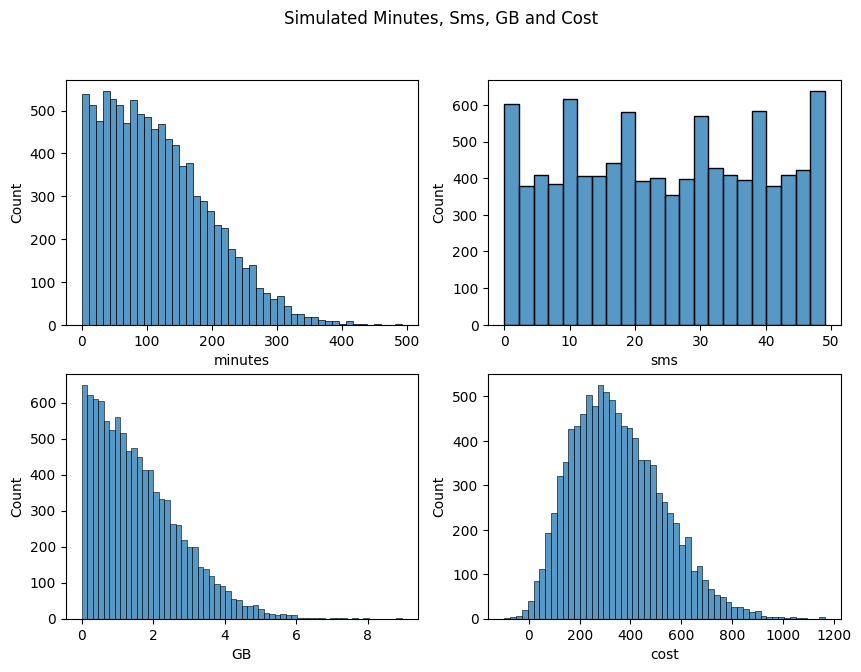

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Skapa en figur med ett 2x2 rutnät av subplots
fig, ax = plt.subplots(2, 2, figsize=[10,7], dpi=100)  # Ställ in storlek (10x7 tum) och upplösning (100 dpi)

# Plotta histogram för variabeln "minutes" i den övre vänstra rutan (ax[0,0])
sns.histplot(data=simulated_variables["minutes"], ax=ax[0,0])

# Plotta histogram för variabeln "sms" i den övre högra rutan (ax[0,1])
sns.histplot(data=simulated_variables["sms"], ax=ax[0,1])

# Plotta histogram för variabeln "GB" i den nedre vänstra rutan (ax[1,0])
sns.histplot(data=simulated_variables["GB"], ax=ax[1,0])

# Plotta histogram för variabeln "cost" i den nedre högra rutan (ax[1,1])
sns.histplot(data=simulated_variables["cost"], ax=ax[1,1])

# Sätt en huvudtitel för hela figuren
fig.suptitle("Simulated Minutes, Sms, GB and Cost")

# Visa plottarna
plt.show()


In [55]:
def clean_variables(df):
    # Filtrera rader baserat på villkoren
    df = df[df["GB"] < 4]
    df = df[df["minutes"] < 300]
    df = df[df["cost"] > 0]
    
    # Återställ index och returnera det rensade DataFrame
    return df.reset_index(drop=True)

# Anropa funktionen och spara det rensade DataFrame
simulated_variables = clean_variables(simulated_variables)

# Skriv ut de första raderna av det rensade DataFrame
print(simulated_variables)


         minutes   sms        GB        cost
0     149.671415  41.0  2.263011  502.396003
1      86.173570  16.0  0.031570  179.072107
2     164.768854  30.0  0.808925  430.008213
3     252.302986  33.0  2.625826  647.244277
4      76.584663  37.0  3.388079  398.016588
...          ...   ...       ...         ...
9315  230.110206  36.0  0.611639  473.661741
9316   99.834497  18.0  1.328020  298.342321
9317   29.468328  19.0  2.811456  252.973057
9318  149.576557  31.0  3.439294  536.176482
9319  164.438845  43.0  1.406414  406.673658

[9320 rows x 4 columns]


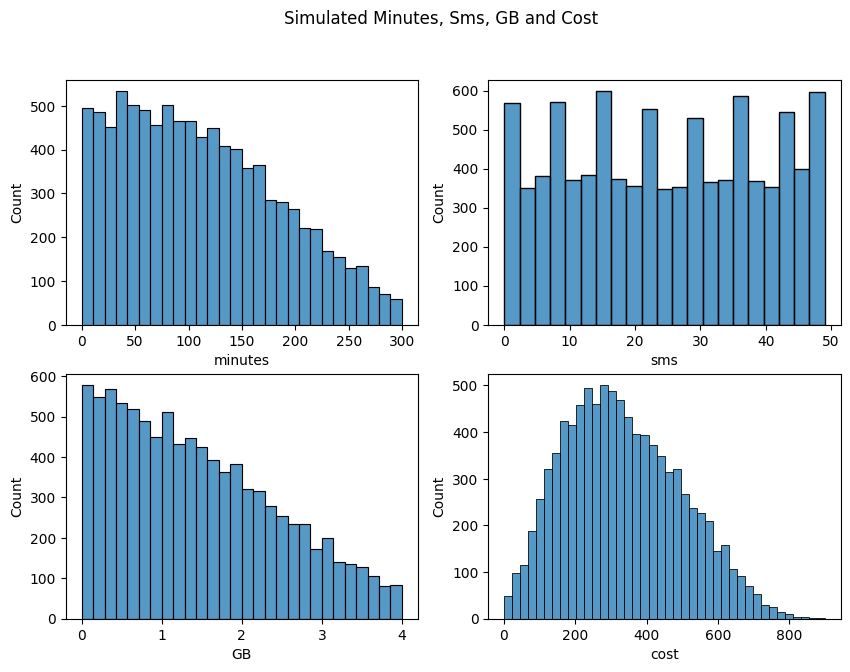

In [56]:
import matplotlib.pyplot as plt  # Importera matplotlib för att skapa plottar
import seaborn as sns  # Importera seaborn för att skapa snyggare diagram

# Skapa en figur med ett 2x2 rutnät av subplots
fig, ax = plt.subplots(2, 2, figsize=[10,7], dpi=100)  
# figsize=[10,7] anger storleken på figuren i tum (bredd x höjd)
# dpi=100 anger upplösningen i punkter per tum (dots per inch)

# Plotta histogram för variabeln "minutes" i den övre vänstra rutan (rad 0, kolumn 0)
sns.histplot(data=simulated_variables["minutes"], ax=ax[0,0])

# Plotta histogram för variabeln "sms" i den övre högra rutan (rad 0, kolumn 1)
sns.histplot(data=simulated_variables["sms"], ax=ax[0,1])

# Plotta histogram för variabeln "GB" i den nedre vänstra rutan (rad 1, kolumn 0)
sns.histplot(data=simulated_variables["GB"], ax=ax[1,0])

# Plotta histogram för variabeln "cost" i den nedre högra rutan (rad 1, kolumn 1)
sns.histplot(data=simulated_variables["cost"], ax=ax[1,1])

# Sätt en huvudtitel för hela figuren
fig.suptitle("Simulated Minutes, Sms, GB and Cost")

# Visa figuren med alla subplots
plt.show()


## 5. Multiple linear regression (*)

&nbsp; a) Perform a train|test split with 0.8 of the data for training. (*)

&nbsp; b) Use the normal equation to compute $\hat{\beta}$ (*)

&nbsp; c) Predict on the test data and compute MAE, MSE and RMSE. (*)

&nbsp; d) Now repeat 4a), 4c), 5a), 5b) using 10, 100, 1000, 10000, 100000, 1000000 samples, and calculate RMSE for each of these simulations. Plot the RMSE against sample size. (**)


<details>

<summary>Hint</summary>

It is important to keep track of the shapes of the vectors, matrices in order for matrix multiplication matmul "@" to work correctly. Also, if you have series object, you need to convert it to numpy. 

</details>

<br/>

<details>
<summary>Answer</summary>


<img src="../assets/RMSE_simulation.png" height="200"/>

</details>

In [57]:
# Funktion för att dela upp en DataFrame i tränings- och testdata
def tt_split(df):
    # Beräkna antalet rader som ska användas för träningsdata (80% av datan)
    train_fraction = int(len(df) * 0.8)

    # Slumpmässigt välj ut träningsdata baserat på train_fraction
    train = df.sample(train_fraction, random_state = 42, replace = False)
    # Använd resterande data som testdata
    test = df.drop(train.index)

    # Dela upp tränings- och testdata i features (X) och target (y)
    X_train, y_train = train.drop("cost", axis=1), train["cost"]
    X_test, y_test = test.drop("cost", axis=1), test["cost"]
    
    # Lägg till en kolumn med ettor (Intercept) för att användas i linjär regression
    X_train.insert(0, "Intercept", 1)
    X_test.insert(0, "Intercept", 1)

    # Returnera de uppdelade datamängderna
    return(X_train, y_train, X_test, y_test)

# Använd funktionen tt_split för att dela upp simulerad data i tränings- och testdata
train_test = tt_split(simulated_variables)

In [58]:
def error_measure(split_data):
    # Anpassa en linjär regressionsmodell till träningsdata (X_train, y_train)
    beta_hat = regression_fit(split_data[0], split_data[1])
    
    # Gör förutsägelser på testdata (X_test) med de uppskattade koefficienterna (beta_hat)
    y_hat = predict(split_data[2].to_numpy(), beta_hat.to_numpy().reshape(4,1))

    # Antalet observationer i testdatamängden
    m = len(split_data[3])
    
    # Omforma y_hat till rätt dimension (m x 1)
    y_hat = np.reshape(y_hat, m)

    # Beräkna Mean Absolute Error (MAE)
    MAE = 1/m * np.sum(np.abs(split_data[3]-y_hat))
    
    # Beräkna Mean Squared Error (MSE)
    MSE = 1/m * np.sum(np.abs(split_data[3]-y_hat)**2)
    
    # Beräkna Root Mean Squared Error (RMSE)
    RMSE = np.sqrt(MSE)

    # Returnera de beräknade felmåtten
    return(MAE, MSE, RMSE)

# Anropa funktionen error_measure på den uppdelade datamängden train_test
error_measure(train_test)

(np.float64(39.237711559715976),
 np.float64(2421.2614765161247),
 np.float64(49.20631541292362))

In [59]:
# Lista med olika storlekar på datamängder som ska simuleras
sample_size = [10, 100, 1000, 10000, 100000, 1000000]

# Lista för att lagra RMSE-värden för varje datamängdsstorlek
RMSE = []

# Loopa igenom varje datamängdsstorlek i sample_size
for sample in sample_size:
    # Skapa simulerad data med given storlek (sample)
    samples = create_variables(sample)
    
    # Rensa datan från eventuella felaktigheter eller saknade värden
    clean_samples = clean_variables(samples)
    
    # Dela upp den rensade datan i tränings- och testdata med funktionen tt_split
    split_samples = tt_split(clean_samples)
    
    # Beräkna felmåtten (MAE, MSE, RMSE) för den uppdelade datan
    result = error_measure(split_samples)
    
    # Lägg till RMSE-värdet (result[2]) i RMSE-listan
    RMSE.append(result[2])

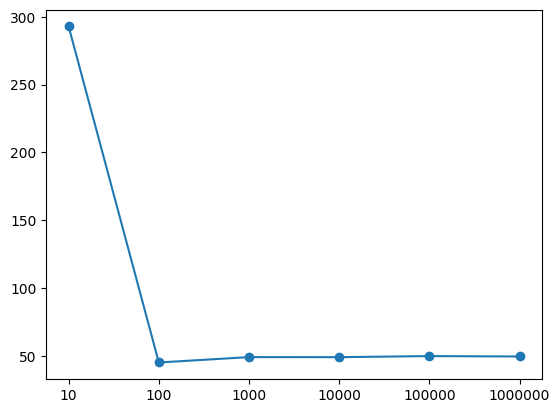

In [60]:
# Skapa en lista med värden som representerar indexen för sample_size
values = range(len(sample_size))

# Skapa en figur och ett ax-objekt för plottning, med en högre upplösning (dpi=100)
fig, ax = plt.figure(dpi=100), plt.axes()

# Sätt x-axelns tick-markörer till värdena i sample_size
plt.xticks(values, sample_size)

# Plotta RMSE-värdena mot indexen (values) med markörer i form av cirklar ("o")
ax.plot(values, RMSE, marker="o")

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---